In [33]:
import requests
requests.get("https://www.rea-group.com/careers/jobs/")

<Response [200]>

In [ ]:

from config import DB_NAME
import sqlite3, os
from scrapers.db import initialise_db
#initialise database if not exists
if not os.path.exists(DB_NAME):
    initialise_db(DB_NAME) 



In [31]:
import sqlite3
with sqlite3.connect('jobs.db') as conn:
    c = conn.cursor()
    c.execute("SELECT title, location, link, posted_at, scraped_at FROM job where company = ?", (1,))
    result = c.fetchall()
result
c.close()


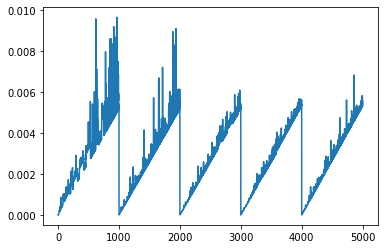

In [30]:
import time
times = []
for x in range(5):
    for i in range(1000):
        tic = time.perf_counter()
        #go up to i number of times
        for j in range(i):
            ('1',
            'Director, Marketing Operations',
            'Chicago',
            'https://job-boards.greenhouse.io/cultureamp/jobs/7217240',
            'NULL',
            '2025-12-15T19:41:12.750467',
            0) in result
        toc = time.perf_counter()
        times.append(toc - tic)
import matplotlib.pyplot as plt
plt.plot(times)

In [1]:
from scrapers.culture_amp_scraper import CultureAmpScraper


scraper = CultureAmpScraper("CultureAmp", "https://www.cultureamp.com/company/careers#open-roles")
jobs = scraper.fetch_jobs()

In [5]:
# Append job details to jobs list dataframe
import pandas as pd
jobs_df = pd.DataFrame(columns=["Title", "Location", "Link"])
for job in jobs:
    title, location = job.select('p')
    link = job.get('href')
    jobs_df = pd.concat([jobs_df, pd.DataFrame({"Title": [title.text.strip()], "Location": [location.text.strip()], "Link": [link]})], ignore_index=True)

#save into db
scraper.save_jobs(jobs_df, DB_NAME)